In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import numpy as np
import random

Imágenes de entrenamiento:
Categoría: No_Fire, Total imágenes: 14357


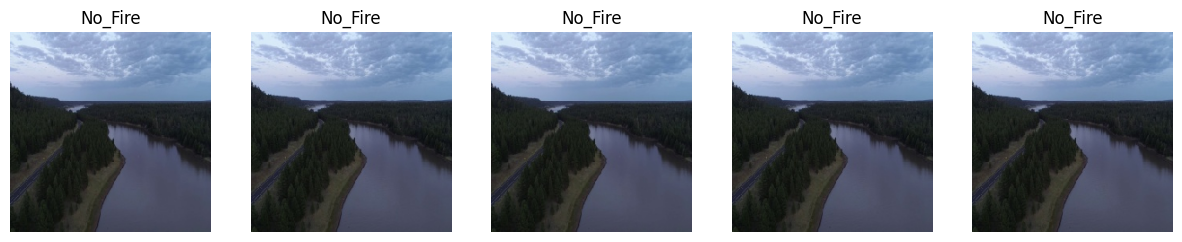

Categoría: Fire, Total imágenes: 25027


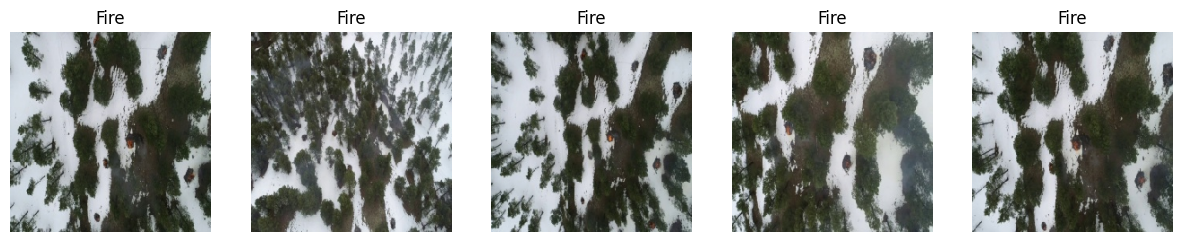


Porcentaje de 'No_Fire': 36.45%
Porcentaje de 'Fire': 63.55%


Imágenes de prueba:
Categoría: Fire, Total imágenes: 5137


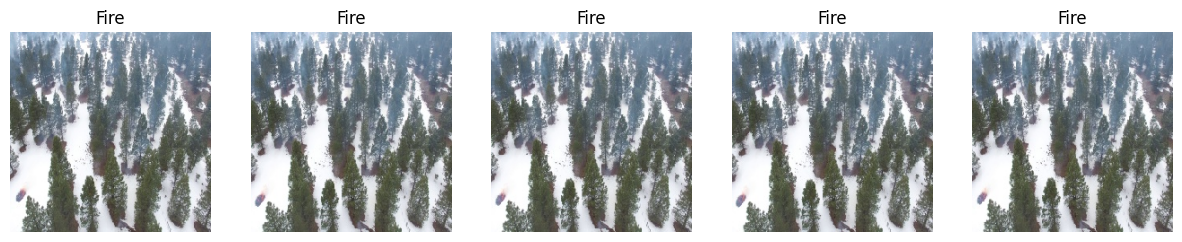

Categoría: No_Fire, Total imágenes: 3480


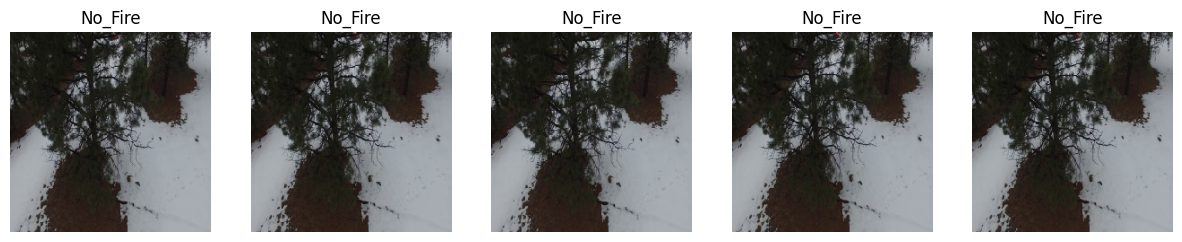


Porcentaje de 'No_Fire': 59.61%
Porcentaje de 'Fire': 40.39%




In [ ]:

def show_images(directorio, num_imagenes=5):
    total=0
    cant_cat=[]
    categorias = os.listdir(directorio)
    for categoria in categorias:
        ruta_categoria = os.path.join(directorio, categoria)
        imagenes = os.listdir(ruta_categoria)[:num_imagenes]
        print(f"Categoría: {categoria}, Total imágenes: {len(os.listdir(ruta_categoria))}")
        total+=len(os.listdir(ruta_categoria))
        cant_cat.append(len(os.listdir(ruta_categoria)))
        plt.figure(figsize=(15, 5))
        for i, img in enumerate(imagenes):
            img_path = os.path.join(ruta_categoria, img)
            img_cargada = load_img(img_path, target_size=(224, 224))  # Redimensiona
            plt.subplot(1, num_imagenes, i + 1)
            plt.imshow(img_cargada)
            plt.axis('off')
            plt.title(categoria)
        plt.show()

    porc_no_fire = (cant_cat[0] / total) * 100
    porc_fire = (cant_cat[1] / total) * 100
    print(f"\nPorcentaje de 'No_Fire': {porc_no_fire:.2f}%")
    print(f"Porcentaje de 'Fire': {porc_fire:.2f}%\n\n")



print("Imágenes de entrenamiento:")
show_images("/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING/PUCP/Proyecto/Training")


print("Imágenes de prueba:")
show_images("/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING/PUCP/Proyecto/Test")




In [5]:
def verify_size(directorio):
    categorias = os.listdir(directorio)
    for categoria in categorias:
        ruta_categoria = os.path.join(directorio, categoria)
        imagenes = os.listdir(ruta_categoria)
        for img in imagenes[:5]:  # Analiza 5 imágenes por categoría
            img_path = os.path.join(ruta_categoria, img)
            img_cargada = load_img(img_path)
            img_array = img_to_array(img_cargada)
            print(f"Categoría: {categoria}, Imagen: {img}, Tamaño: {img_cargada.size}, Formato: {img.split('.')[-1]}")

print("Verificando tamaño y formato de las imágenes:")
verify_size("/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING/PUCP/Proyecto/Training")


Verificando tamaño y formato de las imágenes:
Categoría: No_Fire, Imagen: lake_resized_lake_frame9103.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: No_Fire, Imagen: lake_resized_lake_frame9122.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: No_Fire, Imagen: lake_resized_lake_frame9101.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: No_Fire, Imagen: lake_resized_lake_frame9123.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: No_Fire, Imagen: lake_resized_lake_frame9117.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: Fire, Imagen: resized_frame21793.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: Fire, Imagen: resized_frame25991.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: Fire, Imagen: resized_frame21590.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: Fire, Imagen: resized_frame22216.jpg, Tamaño: (254, 254), Formato: jpg
Categoría: Fire, Imagen: resized_frame22096.jpg, Tamaño: (254, 254), Formato: jpg


Analizando colores en entrenamiento:
Categoría: No_Fire


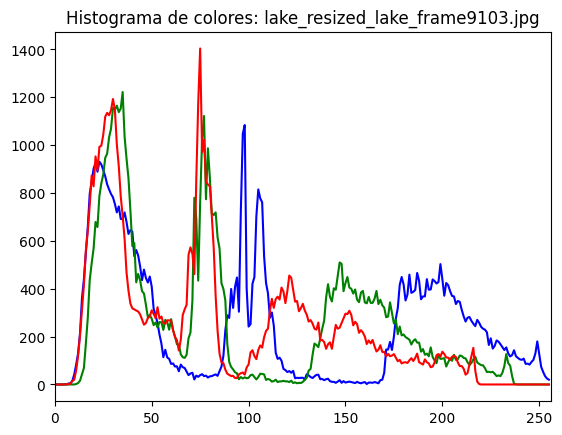

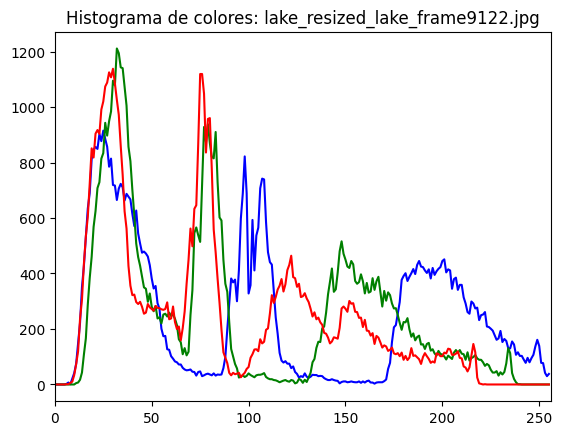

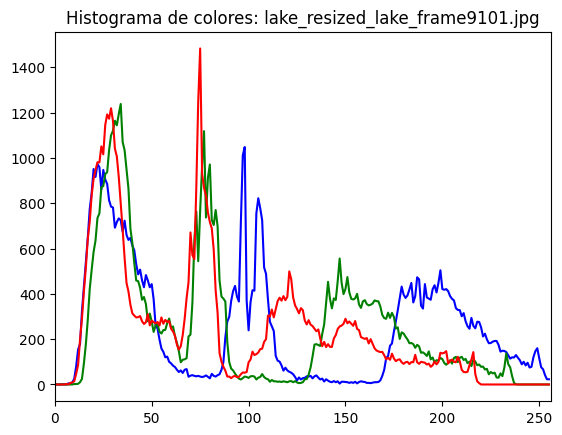

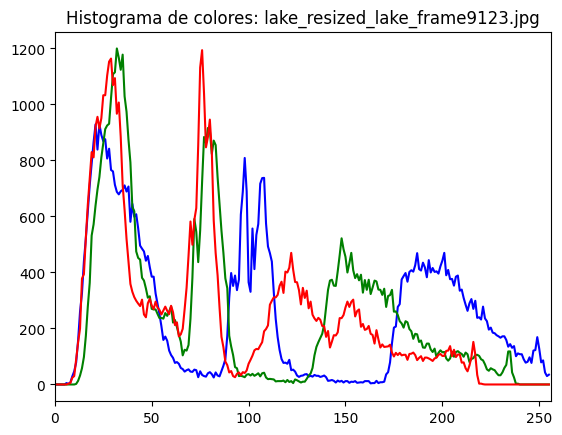

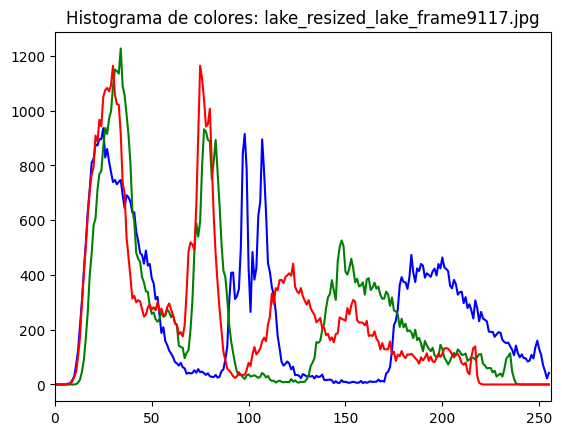

Categoría: Fire


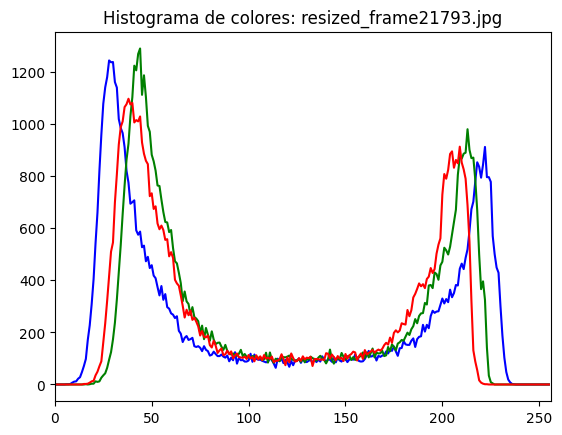

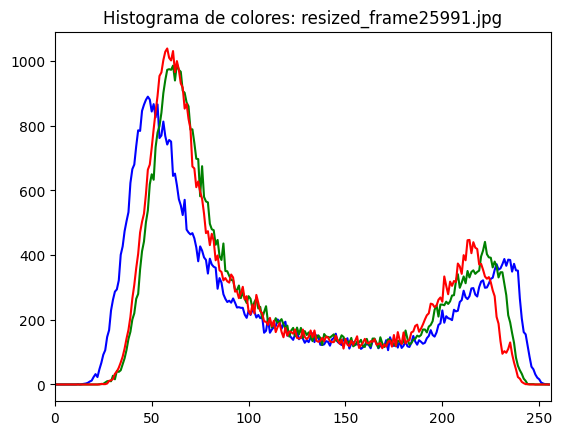

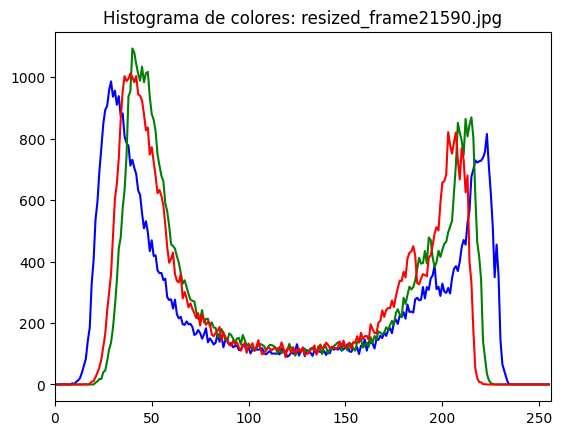

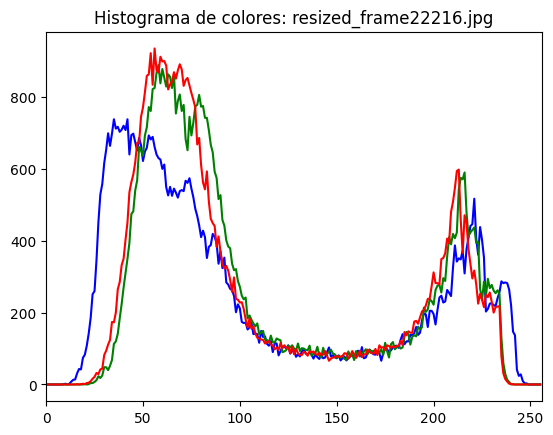

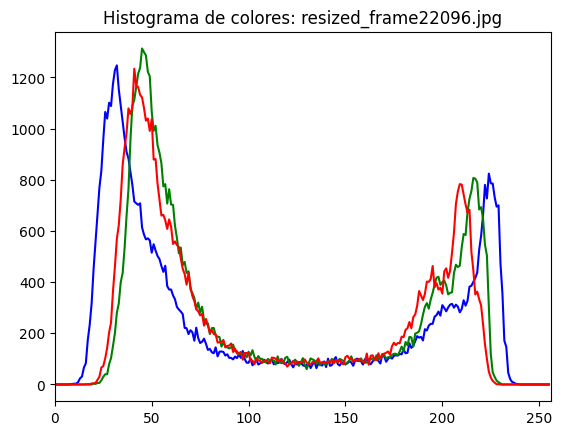

In [6]:
def color_analyze(directorio, num_imagenes=5):
    categorias = os.listdir(directorio)
    for categoria in categorias:
        ruta_categoria = os.path.join(directorio, categoria)
        imagenes = os.listdir(ruta_categoria)[:num_imagenes]
        print(f"Categoría: {categoria}")
        for img in imagenes:
            img_path = os.path.join(ruta_categoria, img)
            img_cargada = cv2.imread(img_path)
            colores = ('b', 'g', 'r')
            plt.figure()
            for i, color in enumerate(colores):
                hist = cv2.calcHist([img_cargada], [i], None, [256], [0, 256])
                plt.plot(hist, color=color)
                plt.xlim([0, 256])
            plt.title(f"Histograma de colores: {img}")
            plt.show()

print("Analizando colores en entrenamiento:")
color_analyze("/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING/PUCP/Proyecto/Training")


Imagen aleatoria:


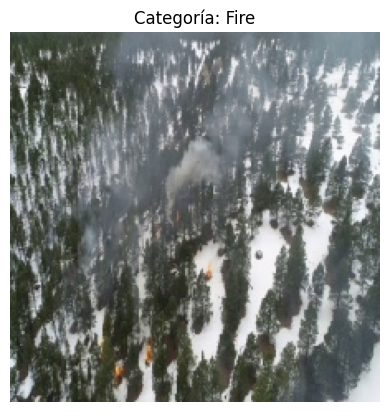

In [7]:
def random_show(directorio):
    categorias = os.listdir(directorio)
    categoria = random.choice(categorias)
    ruta_categoria = os.path.join(directorio, categoria)
    img = random.choice(os.listdir(ruta_categoria))
    img_path = os.path.join(ruta_categoria, img)
    img_cargada = load_img(img_path, target_size=(224, 224))
    plt.imshow(img_cargada)
    plt.axis('off')
    plt.title(f"Categoría: {categoria}")
    plt.show()

print("Imagen aleatoria:")
random_show("/content/drive/MyDrive/Colab Notebooks/DEEP LEARNING/PUCP/Proyecto/Training")
